<div align=center>
		
<font size=5>
In the Name of God
<font/>
<br></br>
<font>
Hamidreza Amirzadeh 401206999
</font>
<p></p>
<font>
Natural Language Processing - Dr. Ehsan Asgari
</font>

</font>
<p></p>
<font>
Sharif University of Technology
</font>

<p></p>
<br/>
<br/>
Fall 2022

<hr/>
<font>
First Assignment - Text exploring
</font>
</div>

_______

<div style="direction:rtl;line-height:300%;"  align=center><font face="B Nazanin" size=5>
<h3> فهرست محتویات</h3>
<ul style="margin-right: 0;">
<li><a href="#section0">مقدمه</a></li>
<li><a href="#section1">نرمال کردن(Normalization)</a></li>
<li><a href="#section2">توکن بندی جملات(Sentence Tokenization)</a></li>
<li><a href="#section3">توکن بندی کلمات و حذف نشانگر ها (Tokenization and Rem. Punctuations)</a></li>
<li><a href="#section4">بررسی توزیع فرکانسی (Frequency Distribution)</a></li>
<li><a href="#section5">ریشه یابی (Stemming and Lemmatization)</a></li>
<li><a href="#section6">حذف ایست واژه ها (Removing Stopwords)</a></li>
<li><a href="#section7">مشخص کردن ادات سخن (POS Tagging)</a></li>
<li><a href="#section8">مشخص کردن سیاق (Concordance)</a></li>
<li><a href="#section9">عبارت یابی (Phrasing)</a></li>
<li><a href="#section10">استخراج عبارات کلیدی (Keyword Extraction)</a></li>
<li><a href="#section11">فاصله ویرایشی (Weighted Levenshtain Distance)</a></li>
</ul>
</div>

________

<div style="direction:rtl;line-height:200%;"><font face="B Nazanin" size=4>
<h id="section0"><font size=10>
مقدمه
</h></font>
<p>
در این تمرین از داده های سایت <a href="https://www.zoomit.ir/">زومیت</a> که یکی از پربیننده‌ترین مجلات اینترنتی فارسی‌زبان در حوزه‌ی فناوری است استفاده می شود.
قسمت علمی این سایت شامل چهار بخش  اصلی نجوم، پزشکی و سلامت، علوم پایه و مهندسی، انرژی و محیط زیست می باشد که در اینجا مورد بررسی قرار می گیرند.
</p>
<p>
استخراج داده ها به این صورت بود که از هر یک از موضوعات ذکر شده، حدود آخرین ۱۰۰ مقاله منتشرشده آن ها را توسط ابزارهای web crawling استخراج کردیم و آن ها را در یک 
فایل csv نوشتیم. لازم به ذکر است که برای نوشتن به زبان فارسی در فایل ذکر شده احتیاج به اینکد کردن حروف داشتیم و به همین دلیل فایل مربوط به داده ها به حجم ۱۱ مگابایت رسید. در حالی که حجم متن خام در حدود ۴ مگابایت است.
 کد مربوط به استخراج داده ها به ضمیمه ارسال شده است.
</p>
<p>
برای شروع کار ابتدا کتابخانه هایی که لازم هستند، ایمپورت می شوند.
</p>
</div>

In [2]:
import random 
import numpy as np
import pandas as pd
import nltk
import pandas as pd
import codecs
import tqdm

<div style="direction:rtl;line-height:200%;"><font face="B Nazanin" size=4>
<p>
فایل داده ای که استخراج کردیم و به شکل فایل json ذخیره شده بود را به صورت دیتافریم بازیابی می کنیم.
توجه شود که هر مقاله شامل ویژگی های روبه رو است:
 موضوع، عنوان، خلاصه، شرح یا پاراگراف ها، لینک اینترنتی 
</p>

In [3]:
df = pd.read_json('data2/zoomit5.json')
df.head()

Category                                              Title  \
0    space   ستون‌های باشکوه آفرینش از نگاه تلسکوپ فضایی ج...   
1    space   اروپا، قمر دوردست مشتری؛ جهانی امیدبخش برای ی...   
2    space           غرش فضایی: راز بلندترین صدای جهان چیست؟    
3    space   سیاه‌چاله‌هایی که سه بار در ثانیه به دور یکدی...   
4    space   ستاره‌شناسان از بزرگ‌ترین دوربین دیجیتال جهان...   

                                            Abstract  \
0  به لطف چشمان تیزبین تلسکوپ فضایی جیمز وب، اکنو...   
1  به‌عقیده دانشمندان، زیر سطح یخ‌زده اروپا می‌تو...   
2  دانشمندان در سال ۲۰۰۶ صدایی بلند موسوم به غرش ...   
3  دو سیاه‌چاله در حال ادغام سیگنال‌های گرانشی شد...   
4  بزرگ‌ترین دوربین دیجیتال جهان برای ستاره‌شناسی...   

                                          Paragraphs  \
0  تلسکوپ فضایی هابل، ستون‌های آفرینش را به شهرت ...   
1  سینتیا فیلیپس مجذوب جدیدترین عکس‌ها از قمر دلخ...   
2  در فضا هیچ‌کس نمی‌تواند صدای جیغ شما را بشنود؛...   
3  مشاهده‌ی یک جفت سیاه‌چاله در حال ادغام که با ن...   
4  بزرگ‌ترین دوربین دیجیتال دنیا با ارتفاع ۱٫۶۵ م...   

                                                Link  
0  https://www.zoomit.ir/space/387180-james-webb-...  
1  https://www.zoomit.ir/space/387081-theres-hope...  
2  https://www.zoomit.ir/space/387074-space-roar-...  
3  https://www.zoomit.ir/space/387035-black-hole-...  
4  https://www.zoomit.ir/space/387013-astronomers...

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=4>
<p>
با استفاده از کد زیر می توان دریافت که از انواع مختلف مقاله ها چه تعداد در اختیار داریم.
</p>

In [4]:
df['Category'].value_counts()

health-medical         90
fundamental-science    89
energy-environment     86
space                  81
Name: Category, dtype: int64

<div style="direction:rtl;line-height:200%;"><font face="B Nazanin" size=4>
<p>
به دیتافریم خامی که وجود داشت، یک ستون که برابر با متن کامل هر مقاله(عنوان+خلاصه+شرح) است، اضافه می کنیم.
همچنین برای ایجاد امکان مقایسه طول کاراکتری متن مقالات، یک ستون دیگر به نام Length ایجاد می کنیم.
</p>

In [5]:
df['Full-Text'] = df[['Title', 'Abstract', 'Paragraphs']].apply(lambda x: x[0] + x[1] + x[2], axis=1)
df['Length'] = df['Full-Text'].apply(len)
df.head()

Category                                              Title  \
0    space   ستون‌های باشکوه آفرینش از نگاه تلسکوپ فضایی ج...   
1    space   اروپا، قمر دوردست مشتری؛ جهانی امیدبخش برای ی...   
2    space           غرش فضایی: راز بلندترین صدای جهان چیست؟    
3    space   سیاه‌چاله‌هایی که سه بار در ثانیه به دور یکدی...   
4    space   ستاره‌شناسان از بزرگ‌ترین دوربین دیجیتال جهان...   

                                            Abstract  \
0  به لطف چشمان تیزبین تلسکوپ فضایی جیمز وب، اکنو...   
1  به‌عقیده دانشمندان، زیر سطح یخ‌زده اروپا می‌تو...   
2  دانشمندان در سال ۲۰۰۶ صدایی بلند موسوم به غرش ...   
3  دو سیاه‌چاله در حال ادغام سیگنال‌های گرانشی شد...   
4  بزرگ‌ترین دوربین دیجیتال جهان برای ستاره‌شناسی...   

                                          Paragraphs  \
0  تلسکوپ فضایی هابل، ستون‌های آفرینش را به شهرت ...   
1  سینتیا فیلیپس مجذوب جدیدترین عکس‌ها از قمر دلخ...   
2  در فضا هیچ‌کس نمی‌تواند صدای جیغ شما را بشنود؛...   
3  مشاهده‌ی یک جفت سیاه‌چاله در حال ادغام که با ن...   
4  بزرگ‌ترین دوربین دیجیتال دنیا با ارتفاع ۱٫۶۵ م...   

                                                Link  \
0  https://www.zoomit.ir/space/387180-james-webb-...   
1  https://www.zoomit.ir/space/387081-theres-hope...   
2  https://www.zoomit.ir/space/387074-space-roar-...   
3  https://www.zoomit.ir/space/387035-black-hole-...   
4  https://www.zoomit.ir/space/387013-astronomers...   

                                           Full-Text  Length  
0   ستون‌های باشکوه آفرینش از نگاه تلسکوپ فضایی ج...    3078  
1   اروپا، قمر دوردست مشتری؛ جهانی امیدبخش برای ی...    6772  
2   غرش فضایی: راز بلندترین صدای جهان چیست؟ دانشم...    9771  
3   سیاه‌چاله‌هایی که سه بار در ثانیه به دور یکدی...    3153  
4   ستاره‌شناسان از بزرگ‌ترین دوربین دیجیتال جهان...    2474

<div style="direction:rtl;line-height:200%;"><font face="B Nazanin" size=4>
<p>
برای ایجاد ذهنیت کلی درمورد طول کاراکتری متن ها، از طریق کد زیر طول مقالات موضوعات مختلف را باهم مقایسه میکنیم.
مشاهده می شود که واریانس طول کلی مقالات با موضوع انرژی و محیط زیست از سایر موضوعات کمتر است. 
مشاهده می شود که طول مقالات علمی دارای کمترین واریانس است و اکثر مقالات این حوزه طول حدود ۵۰۰۰ کاراکتری دارند.
همچنین در سلول بعدی طولانی ترین و کوتاه ترین مقاله استخراج شده اند و موضوع و عنوان و طول کاراکتری آن ها نمایش داده شده است:
</p>

array([[<AxesSubplot:title={'center':'energy-environment'}>,
        <AxesSubplot:title={'center':'fundamental-science'}>],
       [<AxesSubplot:title={'center':'health-medical'}>,
        <AxesSubplot:title={'center':'space'}>]], dtype=object)

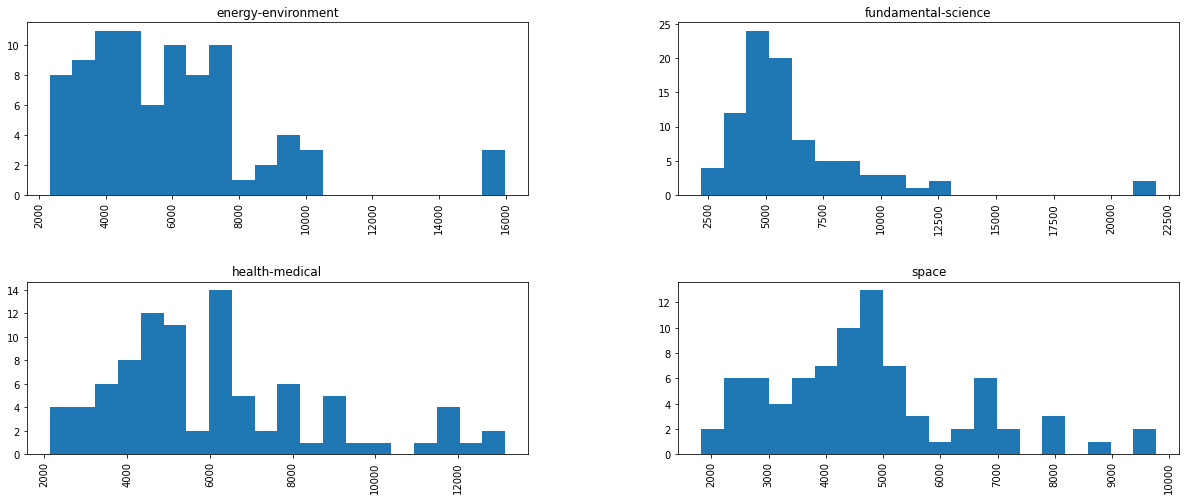

In [158]:
df.hist(column='Length', by='Category', bins=20, figsize=(20,8))

In [14]:
# Longest article
idx = np.argmax(df['Length'])
print(df.iloc[idx]['Title'])
print(df.iloc[idx]['Link'])
print('Length:', df.iloc[idx]['Length'], 'characters')

 چگونه می‌توان داده‌ها را برای هزار سال ذخیره کرد؟ 
https://www.zoomit.ir/fundamental-science/387138-how-to-store-data-for-1000-years
Length: 21957 characters


In [16]:
# shortest article
idx = np.argmin(df['Length'])
print(df.iloc[idx]['Title'])
print(df.iloc[idx]['Link'])
print('Length:', df.iloc[idx]['Length'], 'characters')

 روسیه ماهواره ایرانی خیام را برفراز موشک سایوز پرتاب خواهد کرد 
https://www.zoomit.ir/space/384891-russia-launch-iran-khayyam-satellite
Length: 1818 characters


<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=4>
<p>
این دیتافریم اصلی را برحسب موضوعات مختلف تقسیم بندی می کنیم.
</p>

In [100]:
df_space = df[df['Category']=='space']
df_health = df[df['Category']=='health-medical']
df_science = df[df['Category']=='fundamental-science']
df_energy = df[df['Category']=='energy-environment']

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=4>
<p>
در اینجا برای اینکه متن کامل کل مقالات را در یک لیست داشته باشیم به صورت زیر عمل میکنیم. البته با توجه به ایندکس گذاری سلول بعدی می توان مرزبندی بین موضوعات مقالات را رهگیری کرد.
</p>

In [6]:
zoomit = []
for category in ['space', 'health', 'science', 'energy']:
    for full in eval(f"df_{category}")['Full-Text']:
        zoomit.append(full)

In [7]:
space_start = 0
health_start = 81
science_start = 171
energy_start = 260

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=4>
<h><font size=10 id="section1">
نرمال کردن(Normalization)
</h></font>
<p>
اولین پیش پردازشی که انجام می دهیم، نرمال کردن کلمات موجود در متن است که توسط ابزار hazm انجام می شود.
</p>

In [8]:
from __future__ import unicode_literals
from hazm import *
normalizer = Normalizer()

In [9]:
zoomit_normalized = [[normalizer.normalize(y) for y in x.split()] for x in tqdm.tqdm(zoomit)]

100%|██████████| 346/346 [00:06<00:00, 55.50it/s]


<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=4>
<p>
به عنوان مثال، کلمات نرمال شده مقاله اول به صورت زیر است:
</p>

In [10]:
zoomit_normalized[0]

['ستون\u200cهای',
 'باشکوه',
 'آفرینش',
 'از',
 'نگاه',
 'تلسکوپ',
 'فضایی',
 'جیمز',
 'وب',
 'باشکوه\u200cتر',
 'به',
 'نظر',
 'می\u200cآیند',
 'به',
 'لطف',
 'چشمان',
 'تیزبین',
 'تلسکوپ',
 'فضایی',
 'جیمز',
 'وب،',
 'اکنون',
 'از',
 'ستون\u200cهای',
 'آفرینش،',
 'یکی',
 'از',
 'نمادین\u200cترین',
 'تصاویر',
 'تلسکوپ',
 'هابل،',
 'نسخه\u200cای',
 'پروضوح\u200cتر',
 'و',
 'چشم\u200cنوازتر',
 'در',
 'دست',
 'داریم. تلسکوپ',
 'فضایی',
 'هابل،',
 'ستون\u200cهای',
 'آفرینش',
 'را',
 'به',
 'شهرت',
 'رساند؛',
 'اما',
 'تلسکوپ',
 'فضایی',
 'جیمز',
 'وب',
 'اکنون',
 'با',
 'انتشار',
 'جدیدترین',
 'تصویر',
 'خود،',
 'به',
 'یکی',
 'از',
 'نمادین\u200cهای',
 'عکس\u200cهای',
 'فضایی',
 'جانی',
 'تازه',
 'بخشیده',
 'و',
 'صدها',
 'ستاره',
 'نوزاد',
 'را',
 'درون',
 'این',
 'ابرهای',
 'گردوغبار',
 'معروف',
 'آشکار',
 'کرده',
 'است. ستون\u200cهای',
 'باشکوه',
 'آفرینش',
 'که',
 'در',
 'فاصله',
 'تقریبا',
 'هفت',
 'هزار',
 'سال',
 'نوری',
 'از',
 'ما',
 'واقع',
 'شده\u200cاند،',
 'ابرهای',
 'ستونی\

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=4>
<p>
در اینجا یک مقاله به صورت تصادفی انتخاب می شود و کلمات نرمال شده آن به هم متصل می شوند و متن نرمال شده زیر حاصل می شود:
</p>

In [11]:
for x in random.sample(zoomit_normalized, 1):
    print(' '.join(x))

کشف قدیمی‌ترین شواهد از جراحی قطع عضو با ۳۱ هزار سال قدمت باستان‌شناسان در تحقیقات خود متوجه یک مورد جراحی قطع عضو موفقیت‌آمیز شدند. این قطع عضو ۳۱ هزار سال قبل در بورنئو اندونزی انجام شده بود. ظاهرا اسکلت ۳۱ هزار ساله‌ای که در جزیره بورنئو اندونزی کشف شده، از ناحیه ساق پای چپ قطع عضو شده است. هر چند ممکن است عمل جراحی قطع عضو در عصر سنگ، فوق‌العاده خطرناک به نظر برسد، اما از شواهد این‌طور بر می‌آید که این شکارچی-خوراکجوی جوان پس از این عمل جراحی زنده مانده و برای چندین سال به زندگی خود ادامه داده است. به نقل از پایگاه خبری آی‌اف‌ال‌ساینس، آنچه محققان هفته گذشته در نشریه علمی نیچر گزارش داده‌اند، با اختلاف قدیمی‌ترین شواهدی است که تا به حال از یک عمل جراحی قطع عضو در هر نقطه‌ای از جهان پیدا می‌شود. یک تیم بین‌المللی از محققان از کشف اسکلت این فرد جوان در غار لیانگ‌تبو در بورنئو خبر داده‌اند. لیانگ‌تبو ناحیه‌ای است که به‌خصوص به دلیل آثار هنر سنگی خود در دنیای باستان‌شناسی شهرت جهانی دارد. به‌گزارش ارس تکنیکا، وقتی باستان‌شناسان به اسکلت رسیدند آن را کاملا دست‌نخورده دیدند. بااین‌حال، ا

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=4>
<h><font size=10 id="section2">
توکن بندی جملات(Sentence Tokenization)
</h></font>
<p>
دومین پیش پردازشی که انجام می دهیم، توکن بندی جملات موجود در متن است که توسط ابزار hazm انجام می شود.
</p>

In [13]:
zoomit_sentences = [sent_tokenize(' '.join(x)) for x in tqdm.tqdm(zoomit_normalized)]

100%|██████████| 346/346 [00:00<00:00, 4054.39it/s]


<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=4>
<p>
در اینجا یک مقاله به صورت تصادفی انتخاب می شود و برحسب جملات آن جدا می شود:
</p>

In [14]:
for x in random.sample(zoomit_sentences, 1):
    print(' ### '.join(x))

پرستاران در بریتانیا به عینک هوشمند مجهز می‌شوند سرویس سلامت ملی بریتانیا در پروژه‌ای تحقیقاتی پرستاران را به عینک هوشمند مجهز می‌کند. ### این اولین باری نیست که بریتانیا در صنعت پزشکی به گجت‌های هوشمند متکی می‌شود. ### براساس گزارش بلومبرگ، پرستاران در بخش‌هایی از انگلستان قرار است در قالب پروژه‌ای آزمایشی به هنگام مراجعه به خانه‌ی افراد بیمار از عینک هوشمند مخصوص استفاده کنند. ### این جدیدترین ابتکار سرویس سلامت ملی بریتانیا برای بهبود خدماتی است که به مردم ارائه می‌دهد. ### استفاده‌ی پرستاران از عینک هوشمند وابسته به رضایت مستقیم بیمار است. ### این عینک‌های هوشمند که در واقع هدست واقعیت مجازی محسوب می‌شوند به پرستاران برای رونویسی سوابق پزشکی و انجام راحت‌تر کارهای اداری کمک می‌کنند. ### ازطریق این عینک‌های هوشمند ویدئو به‌صورت زنده برای پزشکانی که در بیمارستان حضور دارند ارسال می‌شود تا آن‌ها بتوانند در زمانی سریع با همکاری یکدیگر، بهترین خدمات را به بیمار ارائه دهند. ### عینک هوشمندی که بریتانیا آزمایش می‌کند مجهز به سیستم تصویربرداری حرارتی برای معاینه‌ی زخم‌ها و جراحات است. ### 

<div style="direction:rtl;line-height:200%;"><font face="B Nazanin" size=4>
<h><font size=6 id="section3">
توکن بندی کلمات و حذف نشانگر ها (Tokenization and Rem. Punctuations)
</h></font>
<p>
سومین پیش پردازشی که انجام می دهیم، حذف نشانگر ها و توکن بندی کلمات موجود در متن است که توسط ابزار hazm انجام می شود.
ابتدا نشانگر ها حذف می شوند و نتیجه در لیست zoomit_sentences_nopunc قرار می گیرد. سپس براساس این لیست، توکن بندی به کمک ابزار hazm انجام می شود.
</p>

In [15]:
def rem_punc(text):
    res = ''
    for char in text:
        if char not in '! # $ % & \ ( ) * + , - ؛ < > » « . / : ; < = > ? @ [ \ ] ^ _ ` { | } ، ؟'.split():
            res += char
    return res
 
zoomit_sentences_nopunc = [[rem_punc(sent) for sent in sents] for sents in tqdm.tqdm(zoomit_sentences)]

100%|██████████| 346/346 [00:02<00:00, 134.57it/s]


In [16]:
zoomit_tokens = [[word_tokenize(word) for word in sent] for sent in tqdm.tqdm(zoomit_sentences_nopunc)]

100%|██████████| 346/346 [00:00<00:00, 719.38it/s]


<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=4>
<p>
به عنوان مثال، کلمات توکن بندی شده مقاله اول به صورت زیر است:
</p>

In [17]:
zoomit_tokens

[[['ستون\u200cهای',
   'باشکوه',
   'آفرینش',
   'از',
   'نگاه',
   'تلسکوپ',
   'فضایی',
   'جیمز',
   'وب',
   'باشکوه\u200cتر',
   'به',
   'نظر',
   'می\u200cآیند',
   'به',
   'لطف',
   'چشمان',
   'تیزبین',
   'تلسکوپ',
   'فضایی',
   'جیمز',
   'وب',
   'اکنون',
   'از',
   'ستون\u200cهای',
   'آفرینش',
   'یکی',
   'از',
   'نمادین\u200cترین',
   'تصاویر',
   'تلسکوپ',
   'هابل',
   'نسخه\u200cای',
   'پروضوح\u200cتر',
   'و',
   'چشم\u200cنوازتر',
   'در',
   'دست',
   'داریم'],
  ['تلسکوپ',
   'فضایی',
   'هابل',
   'ستون\u200cهای',
   'آفرینش',
   'را',
   'به',
   'شهرت',
   'رساند',
   'اما',
   'تلسکوپ',
   'فضایی',
   'جیمز',
   'وب',
   'اکنون',
   'با',
   'انتشار',
   'جدیدترین',
   'تصویر',
   'خود',
   'به',
   'یکی',
   'از',
   'نمادین\u200cهای',
   'عکس\u200cهای',
   'فضایی',
   'جانی',
   'تازه',
   'بخشیده',
   'و',
   'صدها',
   'ستاره',
   'نوزاد',
   'را',
   'درون',
   'این',
   'ابرهای',
   'گردوغبار',
   'معروف',
   'آشکار',
   'کرده_است'],
  ['ستون\u200

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=4>
<p>
در اینجا ده جمله به صورت تصادفی از تمام مقالات انتخاب می شود و توکن های این جملات مشخص می شوند:
</p>

In [163]:
for x in random.sample(zoomit_tokens, 10):
    print(' ### '.join(x[0]))

سیاه‌چاله‌هایی ### که ### سه ### بار ### در ### ثانیه ### به ### دور ### یکدیگر ### می‌چرخند ### نظریه ### اینشتین ### را ### تأیید ### می‌کنند ### دو ### سیاه‌چاله ### در ### حال ### ادغام ### سیگنال‌های ### گرانشی ### شدیدی ### از‌جمله ### تقدیم ### مداری ### و ### نوسان ### را ### نشان ### می‌دهند ### که ### پیش‌بینی‌های ### نظریه‌ی ### نسبیت ### عام ### آلبرت ### اینشتین ### را ### تأیید ### می‌کنند
فشارسنج ### هوشمند ### گارمین ### با ### تأییدیه ### سازمان ### غذا ### و ### دارو ### رونمایی ### شد ### اولین ### دستگاه ### فشارسنج ### گارمین ### با ### توانایی ### سنجش ### فشارخون ### سیستولیک ### و ### دیاستولیک ### رونمایی ### شد
آیا ### دویدن ### در ### محیط ### بیرون ### با ### دویدن ### روی ### تردمیل ### تفاوت ### دارد
چرا ### پس ### از ### رویداد ### مرگ ### بزرگ ### میلیون‌ها ### سال ### طول ### کشید ### تا ### حیات ### روی ### زمین ### احیا ### شود
چرا ### نمی‌توانید ### خودتان ### را ### قلقلک ### دهید
ربات‌های ### کوچک ### ذات‌الریه ### را ### از ### ریه‌های ### موش ###

<div style="direction:rtl;line-height:200%;"><font face="B Nazanin" size=4>
<h><font size=10 id="section4">
بررسی توزیع فرکانسی (Frequency Distribution)
</h></font>
<p>
اولین کار کاوشی که انجام می دهیم بررسی این مورد است که در هریک از چهار موضوع مختلف، کدام کلمات بیشترین نکرار را داشته اند.
بعد از بررسی همانگونه که مشاهده می شود اکثر کلمات پرتکرار در همه موضوعات Stopword ها هستند.
</p>

In [19]:
from nltk import FreqDist
import itertools
import pandas as pd

all_tokens = list(itertools.chain(*itertools.chain(*zoomit_tokens)))
space_tokens = list(itertools.chain(*itertools.chain(*zoomit_tokens[space_start:health_start])))
health_tokens = list(itertools.chain(*itertools.chain(*zoomit_tokens[health_start:science_start])))
science_tokens = list(itertools.chain(*itertools.chain(*zoomit_tokens[science_start:energy_start])))
energy_tokens = list(itertools.chain(*itertools.chain(*zoomit_tokens[energy_start:])))


dataframe = {}

for category in ['space', 'health', 'science', 'energy', 'all']:
     dataframe[category] = FreqDist(eval(f"{category}_tokens")).most_common(50)

freq_analysis = pd.DataFrame(dataframe)
freq_analysis

space           health           science           energy  \
0         (در, 2162)       (در, 2913)        (در, 3150)        (u, 3610)   
1         (از, 2034)        (و, 2853)        (از, 2840)       (در, 2901)   
2          (و, 1684)       (که, 2485)        (که, 2445)       (از, 2517)   
3         (به, 1630)       (از, 2440)         (و, 2420)        (و, 2338)   
4         (را, 1371)       (به, 2304)        (به, 2267)       (که, 1810)   
5         (که, 1371)       (را, 1906)        (را, 1911)       (به, 1732)   
6        (این, 1103)      (این, 1632)       (این, 1746)      (این, 1538)   
7         (است, 796)      (است, 1483)       (است, 1213)       (را, 1448)   
8          (با, 778)        (با, 993)        (با, 1071)      (است, 1071)   
9        (برای, 543)      (برای, 947)       (برای, 875)        (با, 893)   
10       (زمین, 495)        (یا, 486)         (آن, 590)      (۰۰۲۰, 874)   
11      (فضایی, 383)        (آن, 451)        (سال, 538)      (برای, 797)   
12         (آن, 358)        (تا, 445)      (آن‌ها, 476)        (۰۶, 716)   
13        (سال, 309)     (غذایی, 424)         (یک, 466)       (۰۶۲, 614)   
14         (یک, 303)    (می‌کند, 406)         (تا, 443)      (۰۶۲۷, 572)   
15       (ناسا, 295)     (آن‌ها, 402)        (خود, 427)        (تا, 437)   
16       (دارد, 271)      (دارد, 390)         (یا, 373)       (CCu, 436)   
17     (تلسکوپ, 270)  (می‌تواند, 371)        (اما, 369)     (آن‌ها, 421)   
18         (تا, 263)       (خود, 369)     (می‌کند, 346)        (آن, 399)   
19        (خود, 229)       (اما, 363)       (دارد, 308)       (سال, 386)   
20      (سیاره, 209)       (بدن, 358)        (روی, 273)      (۰۶۳۱, 356)   
21        (کرد, 206)      (نشان, 356)    (می‌کنند, 271)        (یک, 352)   
22        (کند, 203)    (می‌شود, 343)    (استفاده, 270)       (خود, 344)   
23       (جیمز, 202)      (کاهش, 329)         (او, 261)        (Fu, 344)   
24     (برخورد, 201)   (می‌کنند, 307)    (می‌گوید, 244)      (زمین, 328)   
25         (وب, 199)        (یک, 305)     (می‌دهد, 243)      (دارد, 317)   
26         (ما, 199)   (می‌گوید, 304)       (وجود, 241)    (می‌کند, 312)   
27      (پرتاب, 198)     (افراد, 296)        (نیز, 236)        (آب, 308)   
28     (می‌کند, 194)       (کند, 292)       (پیدا, 236)   (می‌کنند, 297)   
29        (ماه, 192)    (افزایش, 291)        (کند, 236)       (اما, 284)   
30        (اما, 190)      (رژیم, 282)      (هستند, 231)   (استفاده, 284)   
31         (یا, 190)      (ممکن, 279)        (کرد, 229)     (انرژی, 272)   
32      (بسیار, 188)     (هستند, 273)      (کردند, 227)    (می‌شود, 266)   
33      (هستند, 185)      (وجود, 273)      (انسان, 223)      (۰۶۴۷, 264)   
34    (مأموریت, 184)        (بر, 268)         (ما, 221)     (هستند, 263)   
35       (حیات, 183)    (می‌دهد, 266)   (می‌تواند, 220)      (۰۶۴۶, 240)   
36    (می‌گوید, 182)       (روی, 261)        (بود, 218)        (Cu, 228)   
37       (وجود, 179)       (نیز, 256)       (نشان, 212)   (می‌گوید, 224)   
38      (آن‌ها, 176)       (مغز, 249)       (دیگر, 210)        (یا, 222)   
39        (روی, 172)      (خواب, 244)        (پیش, 199)      (۰۶۴۵, 220)   
40  (دانشمندان, 168)        (ما, 233)       (زمین, 199)     (تولید, 216)   
41       (قرار, 167)    (بیماری, 232)       (کنند, 198)      (کنند, 215)   
42  (سیاره‌های, 152)      (مصرف, 229)        (یکی, 189)    (افزایش, 210)   
43      (تصویر, 149)        (او, 228)        (مغز, 189)      (وجود, 208)   
44     (می‌شود, 149)     (بیشتر, 228)      (بسیار, 188)       (روی, 204)   
45   (می‌تواند, 144)      (کنند, 220)         (شد, 187)      (قرار, 203)   
46         (دو, 144)   (استفاده, 217)         (دو, 187)  (می‌تواند, 197)   
47       (دیگر, 143)     (انجام, 217)       (جدید, 186)        (بر, 193)   
48       (جدید, 140)      (باشد, 215)     (می‌شود, 184)     (بسیار, 190)   
49      (اروپا, 138)       (کمک, 205)  (دانشمندان, 181)    (می‌دهد, 189)   

                 all  
0        (در, 11126)  
1         (از, 9831)  
2          (و, 9295)  
3         (که, 8111)  
4         (به, 7933)  


<div style="direction:rtl;line-height:200%;"><font face="B Nazanin" size=4>
<p>
در اینجا یک سری اطلاعات کلی از تمام توکن ها شامل تعداد آن ها، تعداد توکن های متمایز، میانگین طول کاراکتری هر توکن و همچنین طویلترین توکن استخراج شده اند.
همانگونه که مشاهده می شود طویلترین توکن عبارت «تهوعسرگیجهسردرداسهالدرد» است که معنی دار نیست و ناشی از اشتباه نویسنده در فاضله گذاری ایجاد شده است.
در سلول بعدی عنوان مقاله ای که شامل این طویلترین توکن است به کمک کتابخانه عبارات منظم(re) استخراج می شود.
</p>

In [20]:
print ('%-16s' % 'Number of words', '%-16s' % len(all_tokens))
print ('%-16s' % 'Number of unique words', '%-16s' % len(set(all_tokens)))
avg=np.sum([len(word) for word in all_tokens])/len(all_tokens)
print ('%-16s' % 'Average word length', '%-16s' % avg)
print ('%-16s' % 'Longest word', '%-16s' % all_tokens[np.argmax([len(word) for word in all_tokens])])

Number of words  353713          
Number of unique words 21002           
Average word length 4.592169357643061
Longest word     تهوعسرگیجهسردرداسهالدرد


In [21]:
import re
text = ''
pattern = 'تهوعسرگیجهسردرداسهالدرد'
for article in zoomit:
    if re.search(pattern, article):
        print(sent_tokenize(article)[0])
        break

از علایم زخم معده تا راه‌های درمان آن زخم معده دقیقاً به چه عارضه‌ای گفته می‌شود؟


<div style="direction:rtl;line-height:200%;"><font face="B Nazanin" size=4>
<h><font size=10 id="section5">
ریشه یابی (Stemming and Lemmatization)
</h></font>
<p>
در این قسمت یک تابع نوشته شده است که به عنوان ورودی یک توکن و یک گزینه را می گیرد و برحسب این گزینه یا همان توکن را بدون تغییر برمیگرداند، یا Stemming انجام می دهد یا Lemmatization انجام می دهد یا اینکه هردو را اعمال می کند.
</p>

In [22]:
stemmer = Stemmer()
lemmatizer = Lemmatizer()

def get_lemma_stem(tok, opt=1):
    if opt == 0:
        return tok
    if opt ==1:
        return stemmer.stem(tok)
    if opt ==2:
        return lemmatizer.lemmatize(tok)
    if opt ==3:
        return(lemmatizer.lemmatize(stemmer.stem(tok)))

<div style="direction:rtl;line-height:200%;"><font face="B Nazanin" size=4>
<p>
در اینجا همان تحلیل فرکانسی را روی توکن هایی که Lemmatize شده اند انجام می شود.
توجه شود که در این تحلیل از Stemming صرف نظر کردیم. دلیل این است که این متد در hazm دقت لازم را ندارد و توکن های اشتباه و بی معنی زیادی برمی گرداند.
</p>

In [41]:
opt = 2  # we ignore stemming duo to the inacuracy
# opt = 0

all_tokens_lemstem =   [get_lemma_stem(t, opt) for t in tqdm.tqdm(all_tokens)]
space_tokens_lemstem =   [get_lemma_stem(t, opt) for t in tqdm.tqdm(space_tokens)]
health_tokens_lemstem =   [get_lemma_stem(t, opt) for t in tqdm.tqdm(health_tokens)]
science_tokens_lemstem =   [get_lemma_stem(t, opt) for t in tqdm.tqdm(science_tokens)]
energy_tokens_lemstem =   [get_lemma_stem(t, opt) for t in tqdm.tqdm(energy_tokens)]

dataframe_lemstem = {}

for category in ['space', 'health', 'science', 'energy', 'all']:
     dataframe_lemstem[category] = FreqDist(eval(f"{category}_tokens_lemstem")).most_common(50)
     
freq_analysis_lemstem = pd.DataFrame(dataframe_lemstem)   
freq_analysis_lemstem

100%|██████████| 93632/93632 [00:00<00:00, 753551.83it/s]


space              health             science  \
0           (در, 2162)          (در, 2913)          (در, 3155)   
1           (از, 2035)           (و, 2853)          (از, 2841)   
2            (و, 1684)          (که, 2485)          (که, 2445)   
3           (به, 1636)          (از, 2440)           (و, 2422)   
4           (را, 1371)          (به, 2314)          (به, 2281)   
5           (که, 1371)          (را, 1906)      (کرد#کن, 1969)   
6       (کرد#کن, 1200)      (کرد#کن, 1903)          (را, 1912)   
7          (این, 1107)         (این, 1649)         (این, 1754)   
8         (شد#شو, 849)        (#است, 1483)       (شد#شو, 1262)   
9          (#است, 796)       (شد#شو, 1338)        (#است, 1213)   
10           (با, 778)    (داشت#دار, 1017)          (آن, 1083)   
11        (سیاره, 620)           (با, 993)          (با, 1072)   
12     (داشت#دار, 579)         (برای, 948)         (برای, 875)   
13         (برای, 543)       (داد#ده, 936)     (داشت#دار, 806)   
14           (آن, 541)           (آن, 872)      (بود#باش, 744)   
15         (زمین, 533)  (توانست#توان, 777)       (داد#ده, 668)   
16      (بود#باش, 463)          (غذا, 705)           (یک, 660)   
17           (یک, 411)      (بود#باش, 662)          (سال, 588)   
18        (ستاره, 396)           (یا, 486)  (توانست#توان, 579)   
19  (توانست#توان, 388)           (یک, 462)           (تا, 446)   
20        (فضایی, 385)           (تا, 445)          (خود, 442)   
21       (داد#ده, 385)       (گفت#گو, 440)       (گفت#گو, 441)   
22          (سال, 330)        (افراد, 409)        (انسان, 403)   
23       (تلسکوپ, 323)          (خود, 403)           (یا, 373)   
24       (گفت#گو, 316)          (بدن, 368)          (اما, 369)   
25         (ناسا, 295)          (اما, 363)         (گونه, 324)   
26           (تا, 265)         (نشان, 358)         (دیگر, 301)   
27       (کهکشان, 251)         (رژیم, 358)         (#هست, 281)   
28      (مأموریت, 249)        (بیمار, 352)        (بسیار, 280)   
29          (خود, 240)         (#هست, 348)          (روی, 273)   
30         (#هست, 224)        (بیشتر, 346)         (بزرگ, 272)   
31         (بزرگ, 214)         (کاهش, 335)      (استفاده, 271)   
32        (بسیار, 208)          (مغز, 326)         (جدید, 264)   
33          (ماه, 207)         (دیگر, 298)           (او, 261)   
34       (برخورد, 206)           (بر, 296)         (زمان, 244)   
35          (کند, 203)       (افزایش, 296)         (وجود, 243)   
36         (جیمز, 202)          (کند, 295)          (کند, 239)   
37        (پرتاب, 202)       (مطالعه, 287)        (بیشتر, 236)   
38         (دیگر, 202)         (ممکن, 279)          (نیز, 236)   
39      (دانشمند, 201)         (وجود, 273)         (پیدا, 236)   
40           (وب, 199)          (روی, 261)          (مغز, 230)   
41           (ما, 199)         (سلول, 260)      (دانشمند, 224)   
42         (جدید, 196)          (نیز, 257)         (داده, 222)   
43       (خورشید, 196)        (انسان, 253)     (گرفت#گیر, 222)   
44          (اما, 190)         (خواب, 248)           (ما, 221)   
45           (یا, 190)         (مصرف, 247)         (نشان, 214)   
46      (فضاپیما, 186)        (بسیار, 234)          (پیش, 206)   
47        (تصویر, 185)           (ما, 233)      (رسید#رس, 206)   
48         (حیات, 183)           (او, 228)         (زمین, 204)   
49         (وجود, 179)      (استفاده, 227)          (کار, 193)   

                energy                  all  
0            (u, 3610)          (در, 11133)  
1           (در, 2903)           (از, 9833)  
2           (از, 2517)            (و, 9297)  
3            (و, 2338)           (که, 8111)  
4           (که, 1810)           (به, 7986)  
5           (به, 1755)           (را, 6637)  
6          (این, 1557)       (کرد#کن, 6626)  
7       (کرد#کن, 1554)          (این, 6067)  
8           (را, 1448)        (شد#شو, 4599)  
9        (شد#شو, 1150)         (#است, 4563)  
10        (#است, 1071)           (با, 3736)  
11           (با, 893)            (u, 3610)  
12         (۰۰۲۰, 874)           (آن, 3325)  
13    

<div style="direction:rtl;line-height:200%;"><font face="B Nazanin" size=4>
<h><font size=10 id="section6">
حذف ایست واژه ها (Removing Stopwords)
</h></font>
<p>
برای اینکه به تحلیل بهتری برسیم لازم است کلماتی که بدون معنی خاصی هستند حذف شوند.
در سلول بعدی برای هر چهار موضوع مختلف، توکن های ریشه یابی شده داده می شودند و اگر ایست واژه نباشند، نگه داری می شوند. سپس همان تحلیل فرکانسی مجددا روی توکن هایی که اکنون ریشه یابی شده اند و ایست واژه هم نیستند انجام می شود. همانگونه که مشاهده می شود افعال ربط بیشترین تکرار را در تمام موضوعات دارند.
</p>

In [24]:
# Persian Stopwords
# https://github.com/sobhe/hazm/blob/master/hazm/data/stopwords.dat
stopwords = [normalizer.normalize(x.strip()) for x in codecs.open('stopwords.txt','r','utf-8').readlines()]

In [42]:
all_tokens_lemstem_nonstop = [t for t in tqdm.tqdm(all_tokens_lemstem) if t not in stopwords]
space_tokens_lemstem_nonstop = [t for t in tqdm.tqdm(space_tokens_lemstem) if t not in stopwords]
health_tokens_lemstem_nonstop = [t for t in tqdm.tqdm(health_tokens_lemstem) if t not in stopwords]
science_tokens_lemstem_nonstop = [t for t in tqdm.tqdm(science_tokens_lemstem) if t not in stopwords]
energy_tokens_lemstem_nonstop = [t for t in tqdm.tqdm(energy_tokens_lemstem) if t not in stopwords]

dataframe_lemstem_nonstop = {}
dataframe_lemstem_nonstop['zoomit'] = nltk.FreqDist(all_tokens_lemstem_nonstop).most_common(50)
freq_analysis_nonstop = pd.DataFrame(dataframe_lemstem_nonstop)
freq_analysis_nonstop


dataframe_lemstem_nonstop = {}

for category in ['space', 'health', 'science', 'energy', 'all']:
     dataframe_lemstem_nonstop[category] = FreqDist(eval(f"{category}_tokens_lemstem_nonstop")).most_common(50)

freq_analysis_lemstem_nonstop = pd.DataFrame(dataframe_lemstem_nonstop)
freq_analysis_lemstem_nonstop

100%|██████████| 93632/93632 [00:00<00:00, 287109.55it/s]


space              health             science  \
0       (کرد#کن, 1200)      (کرد#کن, 1903)      (کرد#کن, 1969)   
1         (شد#شو, 849)        (#است, 1483)       (شد#شو, 1262)   
2          (#است, 796)       (شد#شو, 1338)        (#است, 1213)   
3         (سیاره, 620)    (داشت#دار, 1017)     (داشت#دار, 806)   
4      (داشت#دار, 579)       (داد#ده, 936)      (بود#باش, 744)   
5          (زمین, 533)  (توانست#توان, 777)       (داد#ده, 668)   
6       (بود#باش, 463)          (غذا, 705)          (سال, 588)   
7         (ستاره, 396)      (بود#باش, 662)  (توانست#توان, 579)   
8   (توانست#توان, 388)       (گفت#گو, 440)       (گفت#گو, 441)   
9         (فضایی, 385)          (بدن, 368)        (انسان, 403)   
10       (داد#ده, 385)         (نشان, 358)         (#هست, 281)   
11          (سال, 330)         (رژیم, 358)      (استفاده, 271)   
12       (تلسکوپ, 323)        (بیمار, 352)         (زمان, 244)   
13       (گفت#گو, 316)         (#هست, 348)          (مغز, 230)   
14         (ناسا, 295)         (کاهش, 335)      (دانشمند, 224)   
15       (کهکشان, 251)          (مغز, 326)     (گرفت#گیر, 222)   
16      (مأموریت, 249)       (افزایش, 296)         (نشان, 214)   
17         (#هست, 224)       (مطالعه, 287)      (رسید#رس, 206)   
18          (ماه, 207)         (سلول, 260)         (زمین, 204)   
19       (برخورد, 206)        (انسان, 253)          (کار, 193)   
20         (جیمز, 202)         (خواب, 248)       (میلیون, 187)   
21        (پرتاب, 202)         (مصرف, 247)        (تکامل, 186)   
22      (دانشمند, 201)      (استفاده, 227)      (پژوهشگر, 179)   
23           (وب, 199)     (گرفت#گیر, 224)          (DNA, 174)   
24       (خورشید, 196)          (سال, 218)        (جمعیت, 165)   
25      (فضاپیما, 186)        (انجام, 217)        (مصنوع, 162)   
26        (تصویر, 185)         (چربی, 216)          (کشف, 159)   
27         (حیات, 183)         (زمان, 210)      (دانشگاه, 158)   
28         (قرار, 167)          (کمک, 208)         (قرار, 157)   
29       (منظومه, 164)        (سلامت, 208)        (مقاله, 147)   
30        (سیارک, 162)          (کار, 196)         (محقق, 141)   
31       (تصاویر, 149)         (قرار, 195)          (هوش, 140)   
32     (گرفت#گیر, 146)          (وزن, 193)         (هزار, 136)   
33         (مدار, 146)        (درمان, 189)        (انجام, 136)   
34        (اروپا, 139)        (مرتبط, 181)        (پژوهش, 134)   
35          (سطح, 131)          (زخم, 181)         (فسیل, 128)   
36          (کشف, 131)      (پژوهشگر, 171)          (شکل, 126)   
37         (زمان, 128)        (پژوهش, 170)      (اطلاعات, 124)   
38        (فاصله, 122)         (معده, 168)        (ایجاد, 124)   
39          (قمر, 118)         (ورزش, 167)        (بررسی, 123)   
40          (جرم, 118)        (مقاله, 163)       (اندازه, 122)   
41         (نشان, 117)          (قلب, 163)      (اقیانوس, 122)   
42         (سرعت, 117)       (آزمایش, 157)      (حیوانات, 120)   
43        (انجام, 116)        (سرطان, 157)         (کاهش, 120)   
44          (نور, 112)          (روز, 148)          (نام, 120)   
45        (مشتری, 109)        (تأثیر, 146)       (مطالعه, 120)   
46      (رسید#رس, 107)        (کالری, 145)        (زندگی, 118)   
47         (جهان, 106)          (چشم, 144)      (استخوان, 118)   
48          (نام, 106)       (دستگاه, 134)       (انقراض, 117)   
49        (اسپیس, 105)          (موش, 131)        (تولید, 115)   

                energy                  all  
0            (u, 3610)       (کرد#کن, 6626)  
1       (کرد#کن, 1554)        (شد#شو, 4599)  
2        (شد#شو, 1150)         (#است, 4563)  
3         (#است, 1071)            (u, 3610)  
4          (۰۰۲۰, 874)     (داشت#دار, 3115)  
5            (۰۶, 716)       (داد#ده, 2503)  
6      (داشت#دار, 713)      (بود#باش, 2271)  
7           (۰۶۲, 614)  (توانست#توان, 2211)  
8          (۰۶۲۷, 572)       (گفت#گو, 1612)  
9        (داد#ده, 514)          (سال, 1555)  
10  (توانست#توان, 467)         (#هست, 1175)  
11          (CCu, 436)         (زمین, 1095)  
12          (سال, 419)       (استفاده, 885)  
13    

<div style="direction:rtl;line-height:200%;"><font face="B Nazanin" size=4>
<h><font size=10 id="section7">
مشخص کردن ادات سخن (POS Tagging)
</h></font>
<p>
به کمک متد POSTagger ابزار hazm می توان ادات سخن را مشخص کرد و در تحلیل های بعدی مثل مشخص کردن ترکیب های وصفی از آن استفاده کرد.
</p>

In [26]:
tagger = POSTagger(model='postagger.model')

<div style="direction:rtl;line-height:200%;"><font face="B Nazanin" size=4>
<p>
در اینجا توکن های هر یک از موضاعات چهارگانه را به تفکیک بررسی می کنیم و آن هایی که اسم(Noun) هستند را بررسی می کنیم و یک تحلیل فرکانسی روی آن ها انجام می دهیم.
</p>

In [39]:
# before run this cell, we should set opt=0 in the lem_stem cell.

import copy

dataframe_lemstem_nonstop_noun = {}
for category in ['space', 'health', 'science', 'energy', 'all']:
    selected = []
    for token,freq in nltk.FreqDist(eval(f'{category}_tokens_lemstem_nonstop')).most_common(1000):
        if tagger.tag([token])[0][1] == 'N':
                selected.append((token, freq))
    dataframe_lemstem_nonstop_noun[category] = copy.deepcopy(selected[0:40])


dataframe_lemstem_nonstop_noun = pd.DataFrame(dataframe_lemstem_nonstop_noun)
dataframe_lemstem_nonstop_noun

space            health            science            energy  \
0         (زمین, 495)        (بدن, 358)         (سال, 538)        (سال, 386)   
1        (فضایی, 383)       (نشان, 356)     (استفاده, 270)       (زمین, 328)   
2          (سال, 309)       (کاهش, 329)       (انسان, 223)         (آب, 308)   
3         (ناسا, 295)       (رژیم, 282)        (نشان, 212)    (استفاده, 284)   
4       (تلسکوپ, 270)        (مغز, 249)        (زمین, 199)      (انرژی, 272)   
5        (سیاره, 209)       (خواب, 244)         (مغز, 189)      (تولید, 216)   
6         (جیمز, 202)     (بیماری, 232)   (دانشمندان, 181)       (قرار, 203)   
7       (برخورد, 201)       (مصرف, 229)        (قرار, 155)     (اقلیمی, 183)   
8           (وب, 199)    (استفاده, 217)     (دانشگاه, 155)       (جهان, 182)   
9        (پرتاب, 198)      (انجام, 217)         (کشف, 153)  (دانشمندان, 180)   
10         (ماه, 192)        (کمک, 205)         (کار, 151)        (چین, 174)   
11     (مأموریت, 184)       (قرار, 194)   (پژوهشگران, 143)       (کاهش, 174)   
12        (حیات, 183)        (سال, 190)        (زمان, 142)    (تغییرات, 167)   
13   (دانشمندان, 168)     (مطالعه, 189)         (هوش, 140)  (پژوهشگران, 145)   
14        (قرار, 167)        (وزن, 186)       (تکامل, 138)       (نشان, 142)   
15   (سیاره‌های, 152)        (کار, 177)       (انجام, 132)       (کربن, 141)   
16       (تصویر, 149)       (چربی, 171)       (جمعیت, 128)     (دریایی, 133)   
17       (اروپا, 138)   (سلول‌های, 167)      (محققان, 122)      (انجام, 129)   
18      (خورشید, 134)      (درمان, 160)        (کاهش, 119)       (درصد, 121)   
19        (مدار, 133)       (معده, 160)     (اطلاعات, 115)        (سطح, 119)   
20      (تصاویر, 132)  (پژوهشگران, 159)       (تولید, 115)       (مصرف, 116)   
21         (کشف, 128)        (زخم, 141)       (زندگی, 113)    (پرندگان, 112)   
22      (کهکشان, 127)      (کالری, 136)  (ذخیره‌سازی, 112)        (برق, 109)   
23        (دارت, 120)      (سرطان, 133)    (به‌عنوان, 110)        (کار, 109)   
24        (نشان, 117)      (انسان, 130)     (حیوانات, 110)    (محصولات, 104)   
25       (انجام, 116)      (تأثیر, 127)         (شکل, 107)       (ساخت, 103)   
26       (سیارک, 114)        (روز, 125)        (جهان, 102)      (گرمایش, 96)   
27         (سطح, 113)      (زندگی, 122)        (سرعت, 101)      (مطالعه, 95)   
28        (سرعت, 111)        (غذا, 121)      (انقراض, 101)      (درختان, 92)   
29       (مشتری, 109)       (زمان, 120)     (داده‌ها, 100)       (میزان, 92)   
30         (نور, 106)        (دست, 115)        (زمانی, 98)       (تأثیر, 90)   
31    (سیاره‌ای, 105)      (سلامت, 114)          (کمک, 98)    (جنگل‌های, 87)   
32       (اسپیس, 105)      (ابتلا, 112)       (برخورد, 94)        (شرکت, 86)   
33    (دیمورفوس, 102)  (دانشمندان, 112)        (آینده, 91)      (محققان, 86)   
34         (ثبت, 101)       (درصد, 109)       (مطالعه, 90)     (خورشیدی, 86)   
35  (فراخورشیدی, 101)    (دانشگاه, 108)     (انسان‌ها, 88)    (به‌عنوان, 84)   
36        (شمسی, 100)        (چشم, 108)       (اندازه, 87)        (کشور, 83)   
37          (جرم, 99)      (موضوع, 107)          (دست, 85)         (کمک, 83)   
38         (جهان, 95)      (تولید, 107)     (دی‌ان‌ای, 84)      (انتشار, 83)   
39         (ایکس, 92)     (ارتباط, 105)      (اقیانوس, 84)      (متانول, 82)   

                 all  
0        (سال, 1423)  
1       (زمین, 1026)  
2     (استفاده, 856)  
3        (نشان, 827)  
4        (قرار, 719)  
5        (کاهش, 657)  
6   (دانشمندان, 641)  
7       (انجام, 594)  
8   (پژوهشگران, 509)  
9         (کار, 496)  
10      (تولید, 466)  
11      (انسان, 458)  
12         (آب, 455)  
13        (مغز, 443)  
14        (بدن, 441)  
15        (کمک, 430)  
16       (زمان, 426)  
17       (جهان, 424)  
18     (مطالعه, 418)  
19      (انرژی, 418)  
20      (فضایی, 413)  
21    (دانشگاه, 409)  
22        (سطح, 388)  
23        (کشف, 371)  
24       (مصرف, 352)  
25      (زندگی, 346)  
26   (به‌عنوان, 338)  
27       (سرعت, 336)  
28       (درصد, 317)  
29     (برخورد, 310)  
30        (ماه, 307)  

<div style="direction:rtl;line-height:200%;"><font face="B Nazanin" size=4>
<p>
در اینجا توکن های هر یک از موضاعات چهارگانه را به تفکیک بررسی می کنیم و آن هایی که صفت(Adjective) هستند را بررسی می کنیم و یک تحلیل فرکانسی روی آن ها انجام می دهیم.
</p>

In [40]:
# before run this cell, we should set opt=0 in the lem_stem cell.

import copy

dataframe_lemstem_nonstop_noun = {}
for category in ['space', 'health', 'science', 'energy', 'all']:
    selected = []
    for token,freq in nltk.FreqDist(eval(f'{category}_tokens_lemstem_nonstop')).most_common(1000):
        if tagger.tag([token])[0][1] == 'AJ':
                selected.append((token, freq))
    dataframe_lemstem_nonstop_noun[category] = copy.deepcopy(selected[0:40])


dataframe_lemstem_nonstop_noun = pd.DataFrame(dataframe_lemstem_nonstop_noun)
dataframe_lemstem_nonstop_noun

space            health           science            energy  \
0        (منتشر, 87)      (غذایی, 424)     (مصنوعی, 162)      (جهانی, 122)   
1        (مرتبط, 85)      (مرتبط, 181)      (مرتبط, 115)      (مرتبط, 118)   
2      (رادیویی, 60)       (مبتلا, 95)     (باستانی, 90)      (طبیعی, 108)   
3       (دوردست, 51)       (منتشر, 90)       (مختلف, 67)       (منتشر, 62)   
4        (تاریک, 46)        (سالم, 81)       (جدیدی, 66)       (مختلف, 62)   
5         (عظیم, 45)       (مختلف, 78)        (عصبی, 61)     (هسته‌ای, 61)   
6        (مشابه, 44)        (اصلی, 77)       (موجود, 57)        (شدید, 54)   
7       (یادشده, 43)        (قلبی, 76)       (منتشر, 56)        (کمتر, 53)   
8        (جدیدی, 41)        (عصبی, 73)       (بزرگی, 53)       (کمیاب, 53)   
9         (کمتر, 41)       (موجود, 68)        (شبیه, 53)        (اصلی, 52)   
10        (اصلی, 39)        (علمی, 62)       (جنوبی, 53)       (جدیدی, 50)   
11        (علمی, 39)        (مغزی, 62)       (جهانی, 52)     (شیمیایی, 49)   
12       (مختلف, 35)        (منجر, 60)       (طبیعی, 51)        (علمی, 49)   
13       (موجود, 34)       (جدیدی, 50)        (یونی, 49)       (موجود, 44)   
14         (سرخ, 34)        (کمتر, 48)       (مشابه, 46)       (جنوبی, 43)   
15    (مغناطیسی, 33)       (طبیعی, 45)        (کمتر, 45)         (ملی, 42)   
16     (احتمالی, 32)      (ژنتیکی, 44)        (علمی, 44)         (سبز, 42)   
17       (آشکار, 31)      (طولانی, 44)        (اصلی, 43)       (بزرگی, 40)   
18  (شگفت‌انگیز, 30)        (مؤثر, 44)        (آرام, 43)         (گرم, 40)   
19       (مشغول, 29)       (اولیه, 40)       (شمالی, 42)       (شمالی, 40)   
20        (بعدی, 24)      (هوشمند, 39)    (الکتریکی, 41)       (متحده, 35)   
21       (اولیه, 23)       (واقعی, 38)      (ژنتیکی, 39)       (غذایی, 33)   
22      (مستقیم, 23)       (اضافه, 38)      (طولانی, 33)      (پایدار, 32)   
23     (قهوه‌ای, 23)        (شدید, 37)     (شیمیایی, 32)         (خشک, 31)   
24        (دقیق, 22)  (فرآوری‌شده, 36)        (زنده, 32)    (غول‌پیکر, 31)   
25       (نهایی, 22)        (مزمن, 34)       (واقعی, 32)       (کمتری, 31)   
26  (بین‌المللی, 22)      (درمانی, 33)        (دقیق, 32)        (مهمی, 30)   
27     (شیمیایی, 21)      (بالاتر, 33)      (باستان, 31)        (فعلی, 30)   
28        (زنده, 21)      (مختلفی, 32)        (بعدی, 31)     (جایگزین, 28)   
29      (آغازین, 21)       (متحده, 32)  (قدیمی‌ترین, 31)  (زیست‌محیطی, 28)   
30        (گازی, 21)       (دشوار, 31)      (امروزی, 30)    (الکتریکی, 28)   
31        (منجر, 20)        (بدنی, 31)       (کوچکی, 29)       (منقرض, 28)   
32    (غول‌پیکر, 20)       (ورزشی, 31)       (اولیه, 29)      (بالاتر, 28)   
33      (درخشان, 20)  (شبانه‌روزی, 30)       (محدود, 29)      (طولانی, 27)   
34         (عام, 20)        (ثابت, 30)       (کنونی, 28)        (منجر, 27)   
35        (موفق, 20)      (بنیادی, 29)         (جدا, 28)        (غربی, 26)   
36       (متحده, 20)       (مشابه, 28)        (مهمی, 27)       (معادل, 26)   
37         (داغ, 19)         (سبز, 28)      (مشابهی, 27)    (پلاستیکی, 24)   
38        (عجیب, 19)     (قهوه‌ای, 28)        (خاصی, 26)       (شناور, 24)   
39        (بعید, 19)        (خاصی, 27)        (صوتی, 26)       (اولیه, 24)   

               all  
0     (مرتبط, 499)  
1     (غذایی, 481)  
2     (منتشر, 295)  
3     (مختلف, 242)  
4     (طبیعی, 213)  
5      (اصلی, 211)  
6     (جهانی, 210)  
7    (مصنوعی, 210)  
8     (جدیدی, 207)  
9     (موجود, 203)  
10     (علمی, 194)  
11     (کمتر, 187)  
12  (باستانی, 142)  
13     (عصبی, 134)  
14    (مشابه, 133)  
15     (شدید, 129)  
16     (منجر, 123)  
17    (بزرگی, 122)  
18    (اولیه, 116)  
19    (جنوبی, 115)  
20   (طولانی, 113)  
21     (سالم, 111)  
22  (شیمیایی, 110)  
23    (شمالی, 106)  
24    (متحده, 104)  
25   (ژنتیکی, 104)  
26     (زنده, 102)  
27    (مبتلا, 100)  
28      (بعدی, 95)  
29      (شبیه, 94)  
30     (واقعی, 92)  
31      (دقیق, 92)  
32    (یادشده, 88)  
33     (اضافه, 87)  
34      (مهمی, 87)  
35     (دشوار, 85)  
36       (ملی, 84)  
37      (عظیم, 83)

<div style="direction:rtl;line-height:200%;"><font face="B Nazanin" size=4>
<h><font size=10 id="section8">
مشخص کردن سیاق (Concordance)
</h></font>
<p>
به کمک متد concordance ابزار nltk و دادن یک کلمه می توان به سیاق جملاتی که آن کلمه در آن ها به کار رفته \ی برد.
به عنوان مثال در اینجا کلمه «هوش» داده شده و می توان سیاق جملات مربوط به آن را مشاهده کرد. می بینیم که اکثر موارد یافت شده مربوط به هوش مصنوعی و در شاخه علمی هستند.
</p>

In [29]:
zoomit_text = nltk.Text(science_tokens_lemstem_nonstop)
zoomit_text.concordance('هوش')

Displaying 25 of 25 matches:
ر تهدید وجودی سیاره #است ماسک کنفرانس هوش مصنوع آگوست ۲۰۱۹ گفت#گو فرض آینده خیر
گوست ۲۰۱۹ گفت#گو فرض آینده خیرخواهانه هوش مصنوع داشت#دار کرد#کن مشکل سال ۲۰ سال
دقت بزرگ‌نمایی کرد#کن وقت دورنما #است هوش مصنوع خودآموخته شباهت مغز انسان داشت#
 انسان داشت#دار #است چشمگیر سیستم‌های هوش مصنوع استفاده مجموعه برچسب‌دار آموزش 
 علاوه‌بر‌این پژوهشگر علاقه‌مند تشابه هوش ماشین هوش حیوانات یادگیری نظارت‌شده #
این پژوهشگر علاقه‌مند تشابه هوش ماشین هوش حیوانات یادگیری نظارت‌شده #است محدود 
شگاه کالیفرنیا برکلی کرد#کن سیستم‌های هوش مصنوع مدرن اندازه برچسب ساخته‌شده توس
رمقاله‌های مرتبط محقق چینی گفت#گو مدل هوش مصنوع مقیاس مغز ساخته اندمتا بررسی عم
 انسان به‌دنبال بهبود تشخیص زبان توسط هوش مصنوع استساخت هوش مصنوع توانایی رمزگش
بود تشخیص زبان توسط هوش مصنوع استساخت هوش مصنوع توانایی رمزگشایی دقیق گفتار فعا
ارتی ایجاد کرد#کن پاسخ اشاره داشت#دار هوش مصنوع آموزش داد#ده شبکه عصبی مختلف تر
یشین پیش‌بینی ورود انتظار دنبال آموزش هوش مصنوع ترکیب تیم کار دنباله مثلا ۱۰ فر
#کن پیش‌بین

<div style="direction:rtl;line-height:200%;"><font face="B Nazanin" size=4>
<h><font size=10 id="section9">
عبارت یابی (Phrasing)
</h></font>
<p>
به کمک ادات سخنی که مشخص کردیم می توان ترکیب های مختلفی مثل ترکیب های وصفی، قیدی، اسمی و ... را مشخص کرد.
در اینجا یک تابع که ترکیب های مختلف را شناسایی می کند نوشته شده است.
</p>

In [136]:
def phrase_extractor(sentence):
    grammar = r"""
      NVASF: {<N|Ne><AJ>}
      NN: {<N|Ne><N|Ne>}
      GHEIDV: {<ADV><V>}
    """
    cp = nltk.RegexpParser(grammar)
    return (cp.parse(sentence))

In [44]:
sample = zoomit_tokens[200][0][0:13]

In [45]:
tagger.tag(sample)

[('هشدار', 'Ne'),
 ('دانشمندان', 'N'),
 ('دیپ', 'N'),
 ('مایند', 'V'),
 ('و', 'CONJ'),
 ('آکسفورد', 'Ne'),
 ('هوش', 'Ne'),
 ('مصنوعی', 'AJ'),
 ('احتمالا', 'ADV'),
 ('بشریت', 'N'),
 ('را', 'POSTP'),
 ('نابود', 'AJ'),
 ('خواهد_کرد', 'V')]

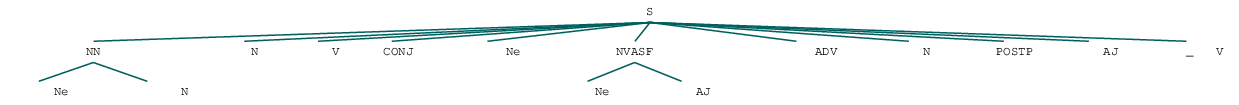

In [137]:
phrase_extractor(tagger.tag(sample))

<div style="direction:rtl;line-height:200%;"><font face="B Nazanin" size=4>
<p>
برای هر یک از موضوعات چارگانه، ترکیب های وصفی و اسمی به صورت زیر استخراج می شوند.
</p>

In [138]:
mosuf_sefat = {}
esm_esm = {}

for category in ['space', 'health', 'science', 'energy', 'all']:
    mosufs = []
    esm = []
    if category == 'space':
        data = zoomit_tokens[space_start:health_start]
    elif category == 'health':
        data = zoomit_tokens[health_start:science_start]
    elif category == 'science':
        data = zoomit_tokens[science_start:energy_start]
    elif category == 'energy':
        data = zoomit_tokens[energy_start:]
    elif category == 'all':
        data = zoomit_tokens
    for article in tqdm.tqdm(data):
        for section in article:
            tree=phrase_extractor(tagger.tag(section))
            for subtree in tree.subtrees():
                if subtree.label() == 'NVASF':
                    mosufs.append(subtree.leaves())
                if subtree.label() == 'NN':
                    esm.append(subtree.leaves())       

    mosuf_texts = [' '.join([x[0],y[0]]) for x,y in mosufs]
    esm_texts = [' '.join([x[0],y[0]]) for x,y in esm]

    mosuf_sefat[category] = nltk.FreqDist(mosuf_texts).most_common(50)
    esm_esm[category] = nltk.FreqDist(esm_texts).most_common(50)



100%|██████████| 346/346 [00:09<00:00, 35.64it/s]


<div style="direction:rtl;line-height:200%;"><font face="B Nazanin" size=4>
<p>
در تحلیل ترکیب های وصفی مشاهده می شود که برای موضوع نجوم پرتکرارترین ترکیب وصفی منظومه شمسی است. برای موضوع پزشکی و سلامت پرتکرارترین ترکیب وصفی رژیم غذایی است. برای موضوع علمی پرتکرارترین ترکیب وصفی هوش مصنوعی است. برای موضوع انرژی پرتکرارترین ترکیب وصفی تغییرات اقلیمی است. همچنین به صورت کلی و در تمامی موضوعات پرتکرارترین ترکیب وصفی هوش مصنوعی است.
</p>

In [139]:
pd.DataFrame(mosuf_sefat)

space                      health  \
0            (منظومه شمسی, 53)           (رژیم غذایی, 101)   
1               (راه شیری, 50)       (مقاله‌های مرتبط, 34)   
2   (سیاره‌های فراخورشیدی, 47)           (افزایش پیدا, 33)   
3               (سال نوری, 41)           (افراد مبتلا, 31)   
4          (منظومه‌ی شمسی, 36)          (ایالات متحده, 28)   
5             (ماده تاریک, 29)         (مقاله‌ی مرتبط, 23)   
6        (مقاله‌های مرتبط, 26)           (بیماری قلبی, 21)   
7              (غرش فضایی, 26)          (کووید طولانی, 20)   
8            (تصاویر جدید, 19)        (موش‌های صحرایی, 17)   
9           (ایالات متحده, 19)           (مقدار زیادی, 16)   
10          (تلسکوپ فضایی, 18)         (بیماران مبتلا, 16)   
11     (سیاره‌های ابرزمین, 17)             (سکته مغزی, 16)   
12     (کهکشان‌های دوردست, 14)             (کاهش پیدا, 15)   
13         (آفریقای جنوبی, 14)       (سلول‌های بنیادی, 15)   
14      (سیاره فراخورشیدی, 13)              (دست پیدا, 14)   
15           (تعداد زیادی, 12)        (وعده‌های غذایی, 14)   
16    (کوتوله‌های قهوه‌ای, 12)           (پارینه سنگی, 14)   
17             (نسبیت عام, 11)              (حد زیادی, 13)   
18         (علوم سیاره‌ای, 11)        (رژیم‌های غذایی, 12)   
19    (اینترنت ماهواره‌ای, 11)            (تشخیص دروغ, 12)   
20           (برابر بیشتر, 10)              (فضای باز, 12)   
21          (حیات فرازمینی, 9)           (درصد بالاتر, 10)   
22           (سازمان فضایی, 9)               (نور آبی, 10)   
23    (پرتوهای سینکروترونی, 8)         (سوالات کنترلی, 10)   
24              (بخش زیادی, 8)          (سوالات مرتبط, 10)   
25     (ستاره‌ی شناخته‌شده, 8)           (اندازه کافی, 10)   
26           (هم‌ارزی ضعیف, 8)      (پژوهش‌های بیشتری, 10)   
27               (چرخ گاری, 8)       (سلول‌های انسانی, 10)   
28              (سیاره سرخ, 7)             (مواد مغذی, 10)   
29     (سیگنال‌های رادیویی, 7)             (موارد زیر, 10)   
30         (پرتوهای کیهانی, 7)          (کالری بیشتری, 10)   
31            (پرواز فضایی, 7)          (سلول‌های عصبی, 9)   
32         (میدان مغناطیسی, 7)           (محصولات لبنی, 9)   
33      (کنفرانسی مطبوعاتی, 7)              (فرد متخصص, 9)   
34              (فضا منتشر, 7)          (مطالعه‌ی جدید, 9)   
35           (درصد بزرگ‌تر, 7)        (بیماری‌های قلبی, 9)   
36     (سیاره‌ی فراخورشیدی, 7)      (ارگانوئیدهای مغزی, 8)   
37      (سیاره‌های بزرگ‌تر, 7)              (آسیب ناشی, 8)   
38      (درجه‌ی سانتی‌گراد, 7)          (پرده‌ی درخشان, 8)   
39         (تصاویر ثبت‌شده, 7)            (لبنیات ممکن, 8)   
40              (سال آینده, 7)           (مغزهای گیاهی, 8)   
41               (حال حاضر, 7)             (پزشک متخصص, 8)   
42          (سیگنال یادشده, 6)         (مطالعه‌ی جدیدی, 8)   
43           (ذرات پرانرژی, 6)          (مگس‌های خانگی, 8)   
44          (مقاله‌ی مرتبط, 6)    (بیماری‌های خودایمنی, 8)   
45            (تصویر نهایی, 6)  (هسته‌ی سوپراکیاسماتیک, 8)   
46          (طوفان خورشیدی, 6)              (شکلات تلخ, 8)   
47           (ماه‌های اخیر, 6)       (رژیم‌های کم‌چربی, 8)   
48          (اهمیت ویژه‌ای, 6)        (عصب‌شناس شناختی, 7)   
49                (فیل مسی, 6)             (هوش مصنوعی, 7)   

                     science                    energy  \
0           (هوش مصنوعی, 99)      (تغییرات اقلیمی, 78)   
1        (آمریکای جنوبی, 32)    (گازهای گلخانه‌ای, 37)   
2    (یادگیری خودنظارتی, 28)        (گرمایش جهانی, 27)   
3        (آمریکای شمالی, 27)        (ایالات متحده, 26)   
4      (مقاله‌های مرتبط, 22)       (مقاله‌ی مرتبط, 25)   
5            (کاهش پیدا, 22)     (جلبک‌های دریایی, 22)   
6       (تغییرات اقلیمی, 22)         (عناصر کمیاب, 22)   
7           (تکامل پیدا, 16)     (مقاله‌های مرتبط, 21)   
8          (افزایش پیدا, 15)       (خودروهای برقی, 20)   
9        (شبکه‌های عصبی, 15)      (همجوشی هسته‌ای, 19)   
10       (مقاله‌ی مرتبط, 14)    (خودروهای متانولی, 18)   
11        (ایالات متحده, 13)      (سوخت‌های فسیلی, 18)   
12         (انقراض جمعی, 12)   (جنگل‌های اقیانوسی, 18)   
13           (شبکه عصبی, 12)         (افزایش پیدا,

<div style="direction:rtl;line-height:200%;"><font face="B Nazanin" size=4>
<p>
در تحلیل ترکیب های اسمی مشاهده می شود که برای موضوع نجوم پرتکرارترین ترکیب اسمی جیمز وب است که اصولا اصلا ترکیب اسمی نیست. برای موضوع پزشکی و سلامت پرتکرارترین ترکیب وصفی کاهش وزن است. برای موضوع علمی پرتکرارترین ترکیب وصفی جایزه ی نوبل است. برای موضوع انرژی پرتکرارترین ترکیب وصفی بیت کوین است که بازهم اصولا اصلا ترکیب اسمی نیست.
</p>

In [140]:
pd.DataFrame(esm_esm)

space                     health  \
0            (جیمز وب, 122)             (کاهش وزن, 73)   
1          (اسپیس ایکس, 65)             (زخم معده, 52)   
2         (تلسکوپ جیمز, 44)            (دیابت نوع, 46)   
3      (سیارک دیمورفوس, 31)            (خطر ابتلا, 42)   
4       (فضاپیمای دارت, 19)             (زوال عقل, 28)   
5         (سیاره مشتری, 17)           (بیماری لثه, 28)   
6      (دهانه‌ی وردفرت, 16)              (رنگ چشم, 26)   
7           (مدار زمین, 15)            (سبک زندگی, 25)   
8         (احتمال وجود, 14)            (مغز انسان, 24)   
9         (زمین برخورد, 14)       (بیماری آلزایمر, 23)   
10          (زمین قرار, 13)            (غذا خوردن, 22)   
11          (اروپا قمر, 12)         (مطالعات نشان, 21)   
12          (سطح اروپا, 12)          (رژیم فستینگ, 20)   
13        (کمربند حیات, 12)              (طول روز, 18)   
14     (مأموریت آرتمیس, 12)  (دستگاه‌های دروغ‌سنج, 18)   
15      (لحظه‌ی برخورد, 12)           (سندرم داون, 17)   
16        (برخورد دارت, 11)         (آمیلوئید بتا, 16)   
17     (ستاره‌ی میزبان, 11)           (سراسر جهان, 16)   
18            (چانگ ای, 11)           (ویتامین دی, 16)   
19       (سحابی شکارچی, 10)          (موجب افزایش, 16)   
20      (ناسا فضاپیمای, 10)    (هلیکوباکتر پیلوری, 16)   
21        (دور دیدیموس, 10)           (درمعرض خطر, 15)   
22         (سکوی پرتاب, 10)             (فشار خون, 15)   
23     (ساختمان مونتاژ, 10)              (طول عمر, 14)   
24      (دی‌اکسید کربن, 10)             (کاهش خطر, 14)   
25           (زمین وجود, 9)            (ضربان قلب, 14)   
26          (لانچ سیستم, 9)            (عوامل خطر, 14)   
27        (براساس گزارش, 9)             (هدف قرار, 13)   
28          (اسپیس لانچ, 9)        (عضله‌سازی کمک, 13)   
29     (سیاره‌ی ابرزمین, 8)            (بدن انسان, 12)   
30           (برابر جرم, 8)              (اپل واچ, 12)   
31           (سال آینده, 8)         (اطمینان حاصل, 11)   
32           (دکتر تنری, 8)        (پژوهش‌ها نشان, 11)   
33           (اعضای تیم, 7)       (تحت‌تأثیر قرار, 11)   
34          (سطح خورشید, 7)           (مورد بررسی, 11)   
35       (جست‌وجوی حیات, 7)            (تغییر رنگ, 11)   
36           (نور ستاره, 7)       (گره‌های لنفاوی, 11)   
37             (دور ماه, 7)          (واکسن سرطان, 10)   
38          (زمین ارسال, 7)          (اوزلم تورجی, 10)   
39         (تلسکوپ هابل, 7)   (آزمون‌های پلی‌گراف, 10)   
40             (سطح ماه, 7)       (آزمون پلی‌گراف, 10)   
41        (مأموریت چانگ, 7)           (امکان وجود, 10)   
42        (تصویر تلسکوپ, 7)    (دانشگاه کالیفرنیا, 10)   
43   (دانشگاه کالیفرنیا, 7)            (درمان زخم, 10)   
44       (تصاویر تلسکوپ, 6)            (جریان خون, 10)   
45           (قمر مشتری, 6)        (کمبود ویتامین, 10)   
46  (آزمایشگاه پیش‌رانش, 6)           (سندرم ماری, 10)   
47             (جت ناسا, 6)               (قشر مغز, 9)   
48             (حد تصور, 6)             (بدن تأثیر, 9)   
49             (جو زمین, 6)              (چربی بدن, 9)   

                         science                    energy  \
0             (جایزه‌ی نوبل, 22)            (بیت کوین, 29)   
1       (ذخیره‌سازی داده‌ها, 20)          (سراسر جهان, 28)   
2             (اقیانوس آرام, 20)         (اتمسفر زمین, 25)   
3               (نرخ باروری, 19)             (جو زمین, 20)   
4              (گرگ تاسمانی, 19)          (مصرف انرژی, 19)   
5               (خطر انقراض, 18)            (قطب شمال, 19)   
6               (سازمان ملل, 14)          (خطر انقراض, 17)   
7               (جمعیت جهان, 13)            (سطح زمین, 17)   
8             (مارینا اسمیت, 13)          (درمعرض خطر, 16)   
9                (طول زندگی, 12)   (جنگل‌های اقیانوسی, 14)   
10              (کاسه‌ی چشم, 12)     (محصولات کشاورزی, 14)   
11              (سراسر جهان, 11)     (بارورسازی ابرها, 14)   
12                 (طول عمر, 11)           (زمین وجود, 12)   
13              (خودی انسان, 11)            (سمت شمال, 12)   
14      (ذخیره‌سازی اطلاعات, 10)        (مورد استفاده, 12)   
15              (سقوط جمعیت, 10)         (سوخت متانول, 12)   
16       

<div style="direction:rtl;line-height:200%;"><font face="B Nazanin" size=4>
<h><font size=10 id="section10">
استخراج عبارات کلیدی (Keyword Extraction)
</h></font>
<p>
به کمک کتابخانه yake می توان عبارات کلیدی یک متن را استخراج کرد.
در سلول های بعدی عبارات کلیدی هریک از مقالات موضوعات چهارگانه استخراج می شوند.
</p>

In [48]:
# !pip install yake
import yake
kw_extractor = yake.KeywordExtractor()
space = ' '.join(space_tokens_lemstem_nonstop)
keywords = kw_extractor.extract_keywords(space)

for kw in keywords:
	print(kw)

('تلسکوپ فضایی جیمز', 6.942423848353331e-08)
('زمین برخورد کرد#کن', 2.2152525211701165e-07)
('تلسکوپ فضایی هابل', 2.3414908014512622e-07)
('کرد#کن تلسکوپ فضایی', 2.590459108287441e-07)
('سال نوری زمین', 3.7763645512418487e-07)
('زمین قرار داشت#دار', 4.200982512636443e-07)
('کرد#کن مقاله مرتبط', 5.437670655109879e-07)
('ستاره قرار داشت#دار', 5.482116552417236e-07)
('زمین پرتاب کرد#کن', 5.84470194288103e-07)
('سیاره کشف کرد#کن', 6.683541526292514e-07)
('پرتاب شد#شو ناسا', 6.84612291264144e-07)
('مأموریت تلسکوپ فضایی', 7.144222219665274e-07)
('داشت#دار تلسکوپ فضایی', 7.610304018994346e-07)
('نشان داد#ده سیاره', 7.912982084728086e-07)
('#است سیاره فراخورشیدی', 8.697005282426233e-07)
('برخورد فضاپیما ناسا', 8.924073754130459e-07)
('سیاره مدار ستاره', 9.039295606198786e-07)
('تصاویر تلسکوپ فضایی', 9.488205589267608e-07)
('سال زمین برخورد', 9.73091875309481e-07)
('ناسا اسپیس ایکس', 9.737012867079153e-07)


In [49]:
health = ' '.join(health_tokens_lemstem_nonstop)
keywords = kw_extractor.extract_keywords(health)

for kw in keywords:
	print(kw)

('کرد#کن رژیم غذا', 7.362601956432219e-08)
('داشت#دار نشان داد#ده', 8.878153639904338e-08)
('داشت#دار رژیم غذا', 1.0201996083421949e-07)
('شد#شو رژیم غذا', 1.0743506412964442e-07)
('کرد#کن نشان داد#ده', 1.0854589355492029e-07)
('#است رژیم غذا', 1.3764032603561112e-07)
('شد#شو نشان داد#ده', 1.539901980788698e-07)
('#است نشان داد#ده', 1.5500915699049748e-07)
('مطالعات نشان داد#ده', 1.6564575024750577e-07)
('رژیم غذا #است', 1.8925544829896528e-07)
('مطالعه نشان داد#ده', 2.0169344796571342e-07)
('نشان داد#ده توانست#توان', 2.1805508564235227e-07)
('پژوهش نشان داد#ده', 2.4229420078086853e-07)
('رژیم غذا لبنیات', 2.440649419160294e-07)
('نشان داد#ده #است', 2.790164825828955e-07)
('بود#باش رژیم غذا', 2.8092723008349233e-07)
('رژیم غذا داشت#دار', 2.8905655569695525e-07)
('رژیم غذا کرد#کن', 2.9450407825728877e-07)
('بود#باش نشان داد#ده', 2.95832541114835e-07)
('وزن کمک کرد#کن', 3.1002199498537556e-07)


In [50]:
science = ' '.join(science_tokens_lemstem_nonstop)
keywords = kw_extractor.extract_keywords(science)

for kw in keywords:
	print(kw)

('DNA #است DNA', 4.4226005547692344e-08)
('DNA کار کرد#کن', 1.1189548124863873e-07)
('کرد#کن کرد#کن DNA', 1.2394256310773025e-07)
('#است DNA #است', 1.329552602168516e-07)
('DNA ذخیره کرد#کن', 1.3801427927958772e-07)
('شد#شو نشان داد#ده', 1.8052931051196426e-07)
('کرد#کن زمان DNA', 1.966377496935198e-07)
('داشت#دار #است توانست#توان', 2.014767566842985e-07)
('سال زندگی کرد#کن', 2.5592854801214377e-07)
('میلیون سال #است', 2.6571627545467703e-07)
('کرد#کن گفت#گو کرد#کن', 2.7410163892554884e-07)
('داد#ده #است DNA', 2.762539418874271e-07)
('کرد#کن مقاله مرتبط', 2.8112328643996366e-07)
('داد#ده #است کرد#کن', 2.8350190430839235e-07)
('نشان داد#ده DNA', 2.97260211486724e-07)
('DNA رمزگذاری کرد#کن', 2.9839739163022087e-07)
('ذخیره\u200cسازی اطلاعات DNA', 3.021904841568932e-07)
('#است داشت#دار #است', 3.047881771765184e-07)
('بود#باش #است کرد#کن', 3.5140955823926656e-07)
('میلیون سال DNA', 3.535068594178251e-07)


In [51]:
energy = ' '.join(energy_tokens_lemstem_nonstop)
keywords = kw_extractor.extract_keywords(energy)

for kw in keywords:
	print(kw)

('کرد#کن مقاله مرتبط', 1.5071586137978192e-07)
('کرد#کن نشان داد#ده', 1.6646329976863663e-07)
('شد#شو کرد#کن سال', 2.0272892058274103e-07)
('کرد#کن #است سال', 2.2127107358089993e-07)
('کرد#کن دانشمند گفت#گو', 2.7426032492792944e-07)
('#است استفاده کرد#کن', 2.8383456505709067e-07)
('قرار داشت#دار #است', 3.024349068444343e-07)
('تولید کرد#کن سال', 3.062200687228906e-07)
('مطالعه کرد#کن کرد#کن', 3.156132117002447e-07)
('توانست#توان استفاده کرد#کن', 3.1798875985903594e-07)
('شد#شو استفاده شد#شو', 3.2570828013651284e-07)
('کرد#کن تغییرات اقلیم', 3.449967229834444e-07)
('شد#شو مقاله مرتبط', 3.5058679108341996e-07)
('تغییرات اقلیم #است', 3.537318833239233e-07)
('داشت#دار استفاده کرد#کن', 3.5404218501227954e-07)
('داشت#دار #است سال', 3.773065249967603e-07)
('کرد#کن کرد#کن پرندگان', 3.789500010142356e-07)
('مطالعه کرد#کن گفت#گو', 3.873769218272654e-07)
('داد#ده استفاده کرد#کن', 4.1265148299931413e-07)
('شد#شو نشان داد#ده', 4.1699342763283655e-07)


<div style="direction:rtl;line-height:200%;"><font face="B Nazanin" size=4>
<h><font size=10 id="section11">
فاصله ویرایشی (Weighted Levenshtain Distance)
</h></font>
<p>
محاسبه فاصله ویرایشی بین دو کلمه به صورت زیر قابل انجام است:
</p>

In [106]:
from strsimpy.weighted_levenshtein import WeightedLevenshtein


def insertion_cost(char):
    return 1.0


def deletion_cost(char):
    return 1.0


def substitution_cost(char_a, char_b):
    return 2.0

weighted_levenshtein = WeightedLevenshtein(
    substitution_cost_fn=substitution_cost,
    insertion_cost_fn=insertion_cost,
    deletion_cost_fn=deletion_cost)

In [111]:
print(weighted_levenshtein.distance('جدا', 'خدا'))

2.0


In [112]:
print(weighted_levenshtein.distance('نیاکان', 'باستان'))

6.0
